<a href="https://colab.research.google.com/github/Fengreny/hello-world/blob/main/svm_face_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [42]:
import matplotlib.pyplot as plt


In [43]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [44]:
faces.images.shape

(1348, 62, 47)

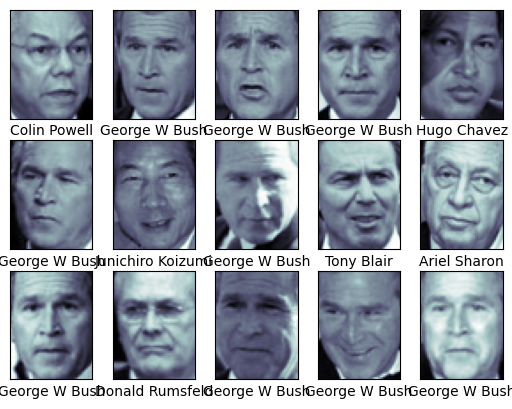

In [45]:
fig,ax= plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap='bone')
  axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [46]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [47]:
pca = RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca,svc)

In [48]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [50]:
grid = GridSearchCV(model, param_grid)

In [51]:
from time import time
start = time()
grid.fit(Xtrain, ytrain)
print("GridSearchCV took %.2f seconds" % (time() - start))
print(grid.best_params_)

GridSearchCV took 67.20 seconds
{'svc__C': 5, 'svc__gamma': 0.001}


In [54]:
model = grid.best_estimator_
yfit = model.predict(Xtest)


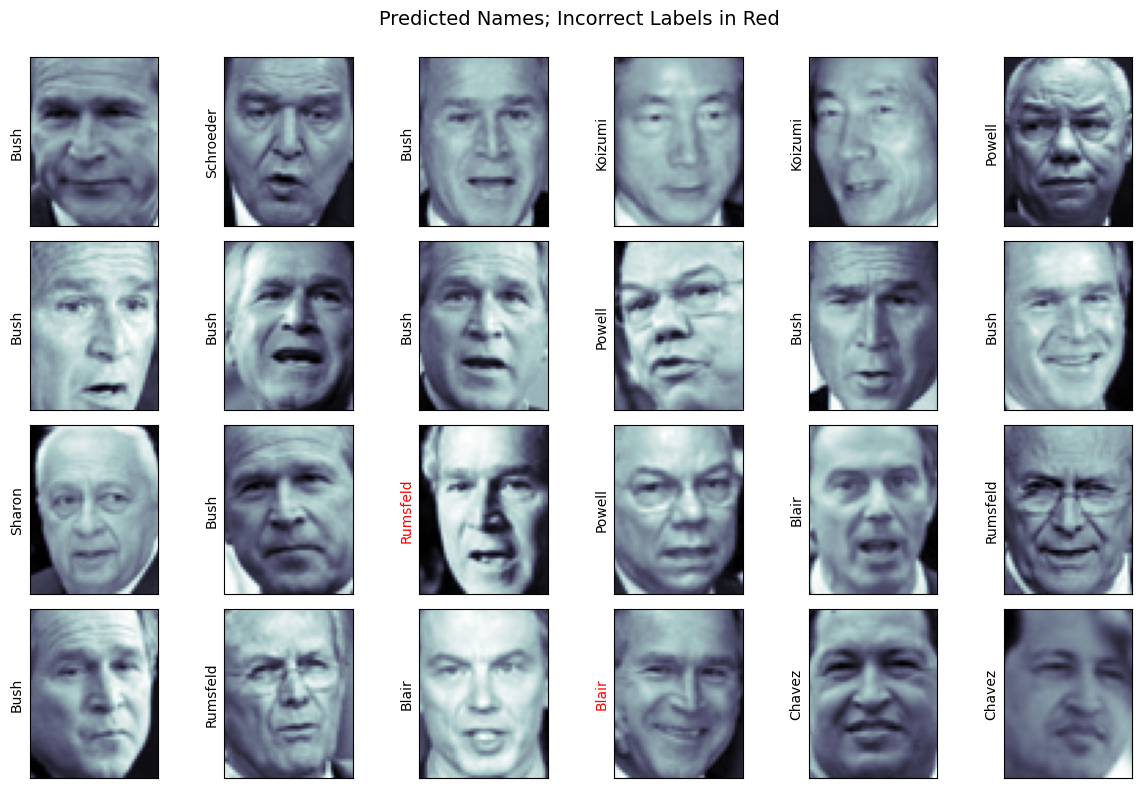

In [56]:
fig, ax = plt.subplots(4, 6, figsize=(12, 8))  # 可以添加figsize来调整整体图形大小
for i, axi in enumerate(ax.flatten()):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    label = faces.target_names[yfit[i]].split()[-1]
    axi.set_ylabel(label, color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.tight_layout()  # 添加这行代码可以让布局更紧凑，防止标签重叠
fig.subplots_adjust(top=0.92)  # 调整标题和子图之间的空间
plt.show()  # 显示图形

